In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df= pd.read_csv("sales_data_sample.csv", encoding="unicode_escape")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [46]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

<Axes: >

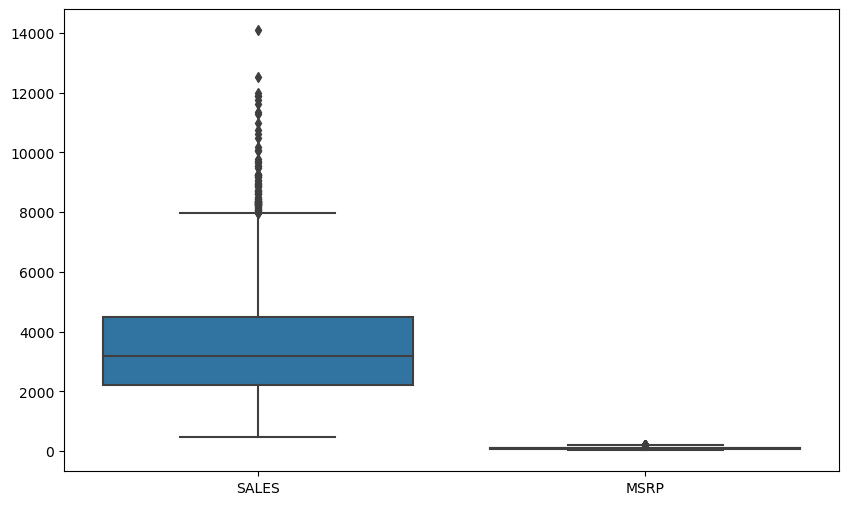

In [47]:

plt.figure(figsize=(10,6))
sns.boxplot(data= df[["SALES","MSRP"]])

In [48]:
dataset = df[["SALES","MSRP"]]


<Axes: >

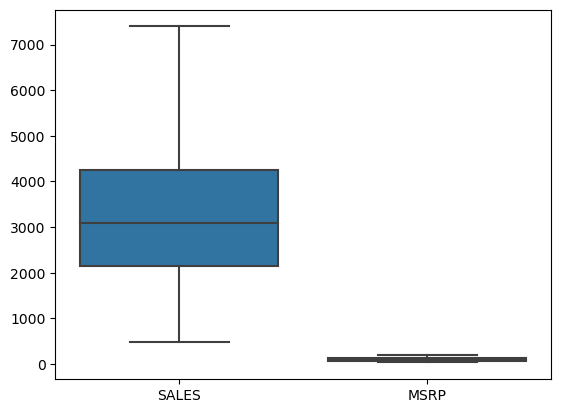

In [52]:
for col in dataset.columns:
    q1= dataset[col].quantile(0.25)
    q3= dataset[col].quantile(0.75)
    iqr= q3 - q1
    
    lb= q1 - 1.5*iqr
    ub= q3 + 1.5*iqr
    
    dataset = dataset[(dataset[col] >= lb) & (dataset[col] <=ub)]
    
sns.boxplot(data= dataset)
   

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
for col in dataset:
    dataset[col] = scaler.fit_transform(dataset[[col]])
dataset

,SALES,MSRP
0,0.345469,0.385093
1,0.330269,0.385093
2,0.492014,0.385093
3,0.472109,0.385093
4,0.683041,0.385093
...,...,...
2818,0.254852,0.130435
2819,0.505632,0.130435
2820,0.713743,0.130435
2821,0.236307,0.130435


/Users/siddharth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/siddharth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/siddharth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/siddharth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

([<matplotlib.axis.XTick at 0x30fb6a0e0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

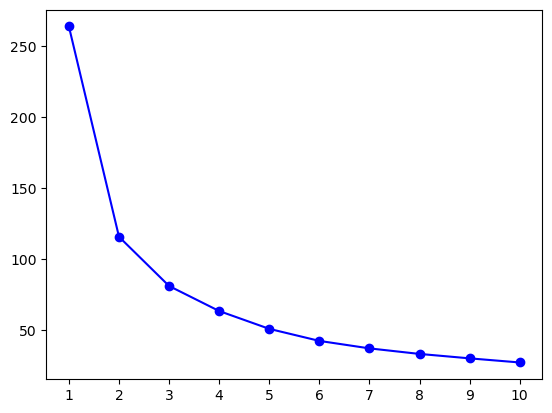

In [56]:
from sklearn.cluster import KMeans
k = range(1,11)
wcss= []
for i in k:
    model= KMeans(n_clusters= i)
    model.fit(dataset)
    wcss.append(model.inertia_)
    
plt.plot( k, wcss, 'bo-')
plt.xticks(k)

In [60]:
optimalk = 3
final_model = KMeans(n_clusters= optimalk)
dataset["hue"]= final_model.fit_predict(dataset)

/Users/siddharth/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [61]:
dataset

,SALES,MSRP,hue
0,0.345469,0.385093,2
1,0.330269,0.385093,2
2,0.492014,0.385093,2
3,0.472109,0.385093,2
4,0.683041,0.385093,2
...,...,...,...
2818,0.254852,0.130435,1
2819,0.505632,0.130435,1
2820,0.713743,0.130435,2
2821,0.236307,0.130435,1


<Axes: xlabel='SALES', ylabel='MSRP'>

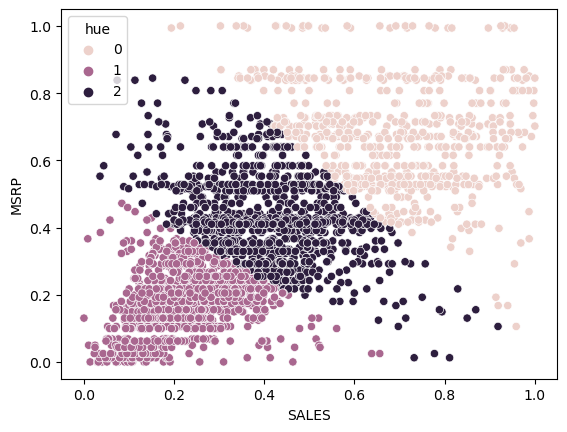

In [62]:
sns.scatterplot(data= dataset, x= "SALES", y= "MSRP", hue= "hue")